## Import ML Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

## Import ML Algorithms

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from scipy                   import stats

## Import Other Libraries

In [4]:
import os
import math
import statistics

## Set Styles of Libraries

#### Seaborn

In [78]:
sns.set_style( 'darkgrid' )

#### Pandas

In [22]:
pd.set_option( 'display.max_columns', None )

## Load Data

In [160]:
data_files_path = os.path.join( os.getcwd() + '', '..', '..', 'data', 'housing_prices', '' )
data_files      = os.listdir( data_files_path )
df              = []

In [161]:
for csv_file in data_files:
    if csv_file != '.ipynb_checkpoints':
        df.append( pd.read_csv( '../../data/housing_prices/' + csv_file ) )
        
print( data_files )

['test.csv', 'train.csv']


In [162]:
test_df, train_df = ( df[0], df[1] )

In [163]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Features

- `SalePrice` - the property's sale price in dollars. This is the target variable that you're trying to predict.
- `MSSubClass` The building class
- `MSZoning` The general zoning classification
- `LotFrontage` Linear feet of street connected to property
- `LotArea` Lot size in square feet
- `Street` Type of road access
- `Alley` Type of alley access
- `LotShape` General shape of property
- `LandContour` Flatness of the property
- `Utilities` Type of utilities available
- `LotConfig` Lot configuration
- `LandSlope` Slope of property
- `Neighborhood` Physical locations within Ames city limits
- `Condition1` Proximity to main road or railroad
- `Condition2` Proximity to main road or railroad (if a second is present)
- `BldgType` Type of dwelling
- `HouseStyle` Style of dwelling
- `OverallQual` Overall material and finish quality
- `OverallCond` Overall condition rating
- `YearBuilt` Original construction date
- `YearRemodAdd` Remodel date
- `RoofStyle` Type of roof
- `RoofMatl` Roof material
- `Exterior1st` Exterior covering on house
- `Exterior2nd` Exterior covering on house (if more than one material)
- `MasVnrType` Masonry veneer type
- `MasVnrArea` Masonry veneer area in square feet
- `ExterQual` Exterior material quality
- `ExterCond` Present condition of the material on the exterior
- `Foundation` Type of foundation
- `BsmtQual` Height of the basement
- `BsmtCond` General condition of the basement
- `BsmtExposure` Walkout or garden level basement walls
- `BsmtFinType1` Quality of basement finished area
- `BsmtFinSF1` Type 1 finished square feet
- `BsmtFinType2` Quality of second finished area (if present)
- `BsmtFinSF2` Type 2 finished square feet
- `BsmtUnfSF` Unfinished square feet of basement area
- `TotalBsmtSF` Total square feet of basement area
- `Heating` Type of heating
- `HeatingQC` Heating quality and condition
- `CentralAir` Central air conditioning
- `Electrical` Electrical system
- `1stFlrSF` First Floor square feet
- `2ndFlrSF` Second floor square feet
- `LowQualFinSF` Low quality finished square feet (all floors)
- `GrLivArea` Above grade (ground) living area square feet
- `BsmtFullBath` Basement full bathrooms
- `BsmtHalfBath` Basement half bathrooms
- `FullBath` Full bathrooms above grade
- `HalfBath` Half baths above grade
- `Bedroom` Number of bedrooms above basement level
- `Kitchen` Number of kitchens
- `KitchenQual` Kitchen quality
- `TotRmsAbvGrd` Total rooms above grade (does not include bathrooms)
- `Functional` Home functionality rating
- `Fireplaces` Number of fireplaces
- `FireplaceQu` Fireplace quality
- `GarageType` Garage location
- `GarageYrBlt` Year garage was built
- `GarageFinish` Interior finish of the garage
- `GarageCars` Size of garage in car capacity
- `GarageArea` Size of garage in square feet
- `GarageQual` Garage quality
- `GarageCond` Garage condition
- `PavedDrive` Paved driveway
- `WoodDeckSF` Wood deck area in square feet
- `OpenPorchSF` Open porch area in square feet
- `EnclosedPorch` Enclosed porch area in square feet
- `3SsnPorch` Three season porch area in square feet
- `ScreenPorch` Screen porch area in square feet
- `PoolArea` Pool area in square feet
- `PoolQC` Pool quality
- `Fence` Fence quality
- `MiscFeature` Miscellaneous feature not covered in other categories
- `MiscVal` Value of miscellaneous feature
- `MoSold` Month Sold
- `YrSold` Year Sold
- `SaleType` Type of sale
- `SaleCondition` Condition of sale

## Preparations for Test Data

- Drop features with a majority missing values
- Standardize the Data

## Handle Missing Values

###### Function

In [281]:
def na_heatmap( df ):
    fig, ax = plt.subplots( figsize = ( 25, 5 ) )
    sns.heatmap( df.isnull(), yticklabels = False, cbar = False )

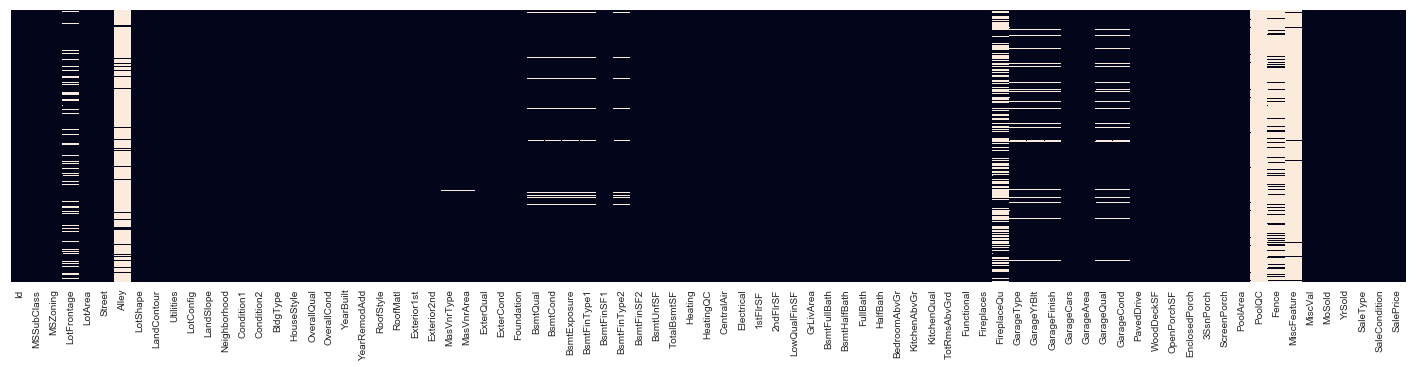

In [165]:
na_heatmap( train_df )

The features for `Alley`, `FireplaceQu`, `PoolQC`, `Fence`, and `MiscFeature` is missing most of the data so it is best to drop these features.

###### Function

In [282]:
def drop_missing_features( df ):
    drop_columns = []
    na_count     = df.isna().sum()

    for i in range( len( na_count ) ):
        if ( na_count[i] / len( df ) ) > 0.4:
            drop_columns.append( df.columns[i] )
            
    return drop_columns

In [166]:
train_df.drop( drop_missing_features( train_df ), axis = 1, inplace = True )

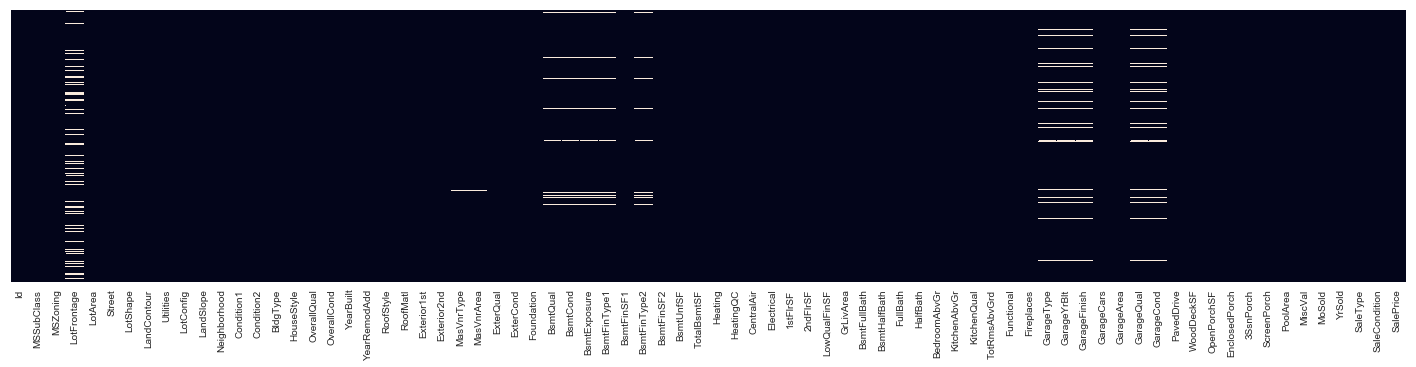

In [169]:
na_heatmap( train_df )

##### Get Data Types of Variables

###### Function

In [284]:
def get_data_types( df ):
    data_types = []

    for i in range( len( train_df.columns ) ):
        data_types.append( str( train_df.columns[i] ) + " " + str( train_df[ train_df.columns[i] ].dtype ) )
        data_types[ i ] = data_types[ i ].split(" ")

    data_types = pd.DataFrame( data_types )
    return data_types.transpose()

In [175]:
get_data_types( train_df )

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75
0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,int64,int64,object,float64,int64,object,object,object,object,object,object,object,object,object,object,object,int64,int64,int64,int64,object,object,object,object,object,float64,object,object,object,object,object,object,object,int64,object,int64,int64,int64,object,object,object,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,object,int64,object,int64,object,float64,object,int64,int64,object,object,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,object,object,int64


##### Get Numeric Indices

###### Function

In [285]:
def get_numeric_indices( df ):
    indices = []

    for i in range( len( train_df.columns ) ):
        if train_df[ train_df.columns[i] ].dtype == 'int64' or\
           train_df[ train_df.columns[i] ].dtype == 'float64':
            indices.append(i)
            
    return indices

In [178]:
indices = get_numeric_indices( train_df )

##### Impute Feature with Missing Values

###### Function

In [283]:
def impute_numeric(df):
    missing_points = None

    # For Every Column
    for i in range( 1, len( df.columns ) ):
        # If Column is Numeric
        if i in indices:
            # Get Missing Values for Column
            missing_points = df[ df.columns[i] ].isna()

            # For Every Row in Column
            for j in range( len( df ) ):
                # If the row's value is missing
                if missing_points[j] == True:
                    # Impute the Missing Value as the mean
                    df[ df.columns[i] ][j] = df[ df.columns[i] ].mean()

In [279]:
impute_numeric( train_df )

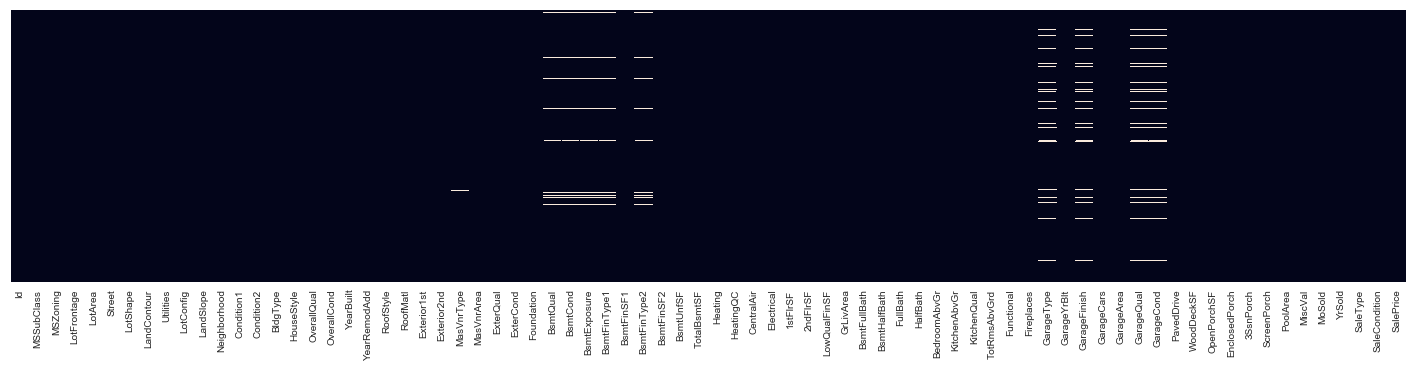

In [280]:
na_heatmap( train_df )

At this point all missing values for the numeric features have been imputed to be the mean value of all that feature's observations.

##### Drop Categorical Features with Majority Class 

In [ ]:
# For every categorical feature
    # Get the count of each unique value
        # If the majority of a column is dominated by a single value
            # drop the value

## Transform Test Data

##### Standardize Numeric Variable Values